## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  This project is important so i can get some practice working with the difficulties of doing one.

For this project, i will be working with the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability and basic Infos

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
fonte = "ab_data.csv"
df = pd.read_csv(fonte)
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [3]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
df.shape

(294478, 5)

In [6]:
df.shape[0]

294478

In [7]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [8]:
len(pd.unique(df['user_id']))

290584

In [9]:
df["user_id"].value_counts()

746755    2
722274    2
892271    2
736112    2
728134    2
         ..
700160    1
698113    1
704258    1
702211    1
630732    1
Name: user_id, Length: 290584, dtype: int64

In [10]:
df['converted'].mean()

0.11965919355605512

In [11]:
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [12]:
df.query('group == "treatment" & landing_page != "new_page"').shape[0]

1965

In [13]:
df.query('group == "control" & landing_page != "old_page"').shape[0]

1928

In [14]:
1965 + 1928

3893

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.

In [16]:
df2 = df.copy()

In [17]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [18]:
indexNames = df2[ (df2['group'] == 'treatment') & (df2['landing_page'] != 'new_page') ].index
df2.drop(indexNames , inplace=True)

In [19]:
df2.query('group == "treatment" & landing_page != "new_page"').shape[0]

0

In [20]:
indexNames = df2[ (df2['group'] == 'control') & (df2['landing_page'] != 'old_page') ].index
df2.drop(indexNames , inplace=True)

In [21]:
df2.query('group == "control" & landing_page != "old_page"').shape[0]

0

In [22]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** to answer:

a. How many unique **user_id**s are in **df2**?

In [23]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [24]:
df2["user_id"].value_counts()

773192    2
630836    1
634271    1
753093    1
751044    1
         ..
803549    1
809694    1
807647    1
895712    1
630732    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [25]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [26]:
df2.iloc[0:3,0:2]

,user_id,timestamp
0,851104,2017-01-21 22:11:48.556739
1,804228,2017-01-12 08:01:45.159739
2,661590,2017-01-11 16:55:06.154213


In [27]:
df2.loc[[1899]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [28]:
df2.drop(1899, inplace=True)

d. What is the probability of an individual converting regardless of the page they receive?

In [29]:
df2['converted'].mean()

0.11959708724499628

e. Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

f. Given that an individual was in the `treatment` group, what is the probability they converted?

In [31]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

g. What is the probability that an individual received the new page?

In [32]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0] 

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**ANSWER**: There is no sufficient evidence to show us that the new page is better, actually the old page was better, and we can see that we have 50% of chance of an individual receiving either page to access.

<a id='ab_test'></a>
### Part II - A/B Test - Class starts here!

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [33]:
pnew = df2['converted'].mean()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [34]:
pold = df2['converted'].mean()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [35]:
nnew = df2.query('group == "treatment"').shape[0]
nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [36]:
nold = df2.query('group == "control"').shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [37]:
new_page_converted = np.random.binomial(1, pnew, nnew).mean()
new_page_converted

0.11980593214506917

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [38]:
old_page_converted = np.random.binomial(1, pold, nold).mean()
old_page_converted

0.1210884260087834

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [39]:
new_page_converted - old_page_converted

-0.0012824938637142347

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [40]:
p_diffs = []
for i in range(10000):
    df_samp = df2.sample(df2.shape[0], replace = True)
    new = df_samp.query('group == "treatment"').shape[0]
    old = df_samp.query('group == "control"').shape[0]
    pnew = df_samp['converted'].mean()
    pold = df_samp['converted'].mean()
    new_page_converted = np.random.binomial(1, pnew, new).mean()
    old_page_converted = np.random.binomial(1, pold, old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'Histogram')

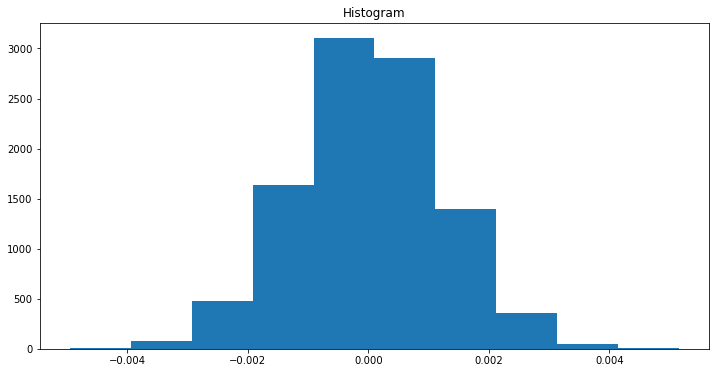

In [41]:
plt.figure(figsize = (12,6))
plt.hist(p_diffs)
plt.title('Histogram')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
old_m = df2.query('group =="control"')['converted'].mean()
new_m = df2.query('group =="treatment"')['converted'].mean()
org_diff = new_m - old_m

p_diffs2 = np.array(p_diffs)

#
(p_diffs2 > org_diff).mean()

0.9041

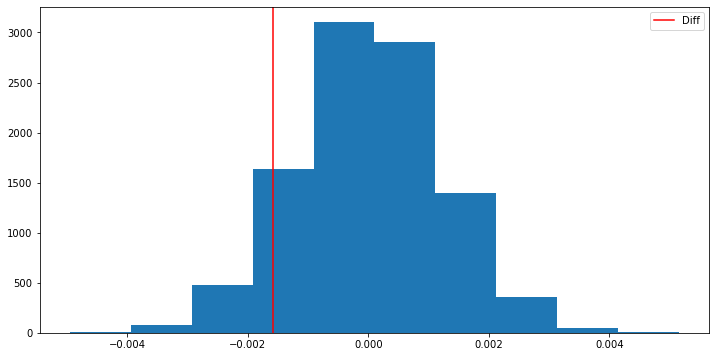

In [43]:
plt.figure(figsize = (12,6))
plt.hist(p_diffs)
plt.axvline(x=org_diff, color='r', label="Diff")
plt.legend()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

0.9064 or 90,64% is the p-value! When we have a large p-value we cant reject the null hypothesis ($H_0$) and when we have a small p-value, we can reject the null and go with the alternative ($H_1$). So, in this experiment we stay with the null (The old page)!

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [45]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page" ').shape[0]
n_new = df2.query('landing_page == "new_page" ').shape[0]

In [46]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [47]:
# The first two values (array) are the number of successes
# The second two values (array) are the number of observations
# smaller means that the alternative hypothesis is p1 < p2
zstats, pval = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new], alternative = 'smaller') 

#display z_score and p_value
print(zstats)
print(pval)

1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

The p-value is the same from the previous parts , so the z-score give us the same p-value, which also means we fail to reject the null in both (The same answer as before)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic Regression! This is a classification problem, so the Linear Regression would not fit here.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
df3 = df2.copy()
df3.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [49]:
# which is 1 when an individual receives the treatment and 0 if control
# So i need the treatment column
pd.get_dummies(df3['group'])

,control,treatment
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
294473,1,0
294474,1,0
294475,1,0
294476,1,0


In [50]:
df3['intercept'] = 1
df3['ab_page'] = pd.get_dummies(df3['group'])['treatment']
df3.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [51]:
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        12:14:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

Because Log. Regression is a two sided test (Equal and not equal) and in Part II it was an one sided test

##### Part 2 Hypothesis

$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

##### Part 3 (Log Regression) Hypothesis
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} \neq 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

It may be a good idea, and it may be not. We dont know how the additional factor will influence the results, it can be statistcally good or it can produce errors, like we saw in the MLR topic with the multicollinearity problem, so it can be highly correlated with each other and produces some misleading infos.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [53]:
fonte2 = 'countries.csv'
ct = pd.read_csv(fonte2)
ct.head(3)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK


In [54]:
df3.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


In [55]:
ct2 = df3.join(ct.set_index('user_id'), on = 'user_id')
ct2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [56]:
pd.get_dummies(ct2['country'])[['US','UK']]

,US,UK
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
294473,1,0
294474,1,0
294475,1,0
294476,1,0


In [57]:
ct2[['US','UK']] = pd.get_dummies(ct2['country'])[['US','UK']]
ct2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0


In [58]:
logit_mod = sm.Logit(ct2['converted'], ct2[['intercept', 'US', 'UK', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        12:14:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
ct2['us_ab_page'] = ct2['US'] * ct2['ab_page']
ct2['uk_ab_page'] = ct2['UK'] * ct2['ab_page']
ct2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,us_ab_page,uk_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0,1,0


In [61]:
# We got some good info using this new model... But i still think they p-values are very large

logit_mod = sm.Logit(ct2['converted'], ct2[['intercept', 'US', 'UK', 'ab_page', 'us_ab_page', 'uk_ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 28 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        12:26:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
us_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
uk_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

# Conclusion!

Using all this methods still lead us to the same conclusion as the first one! The p-values using the countries where somehow relevant, but when we put it all together (interaction between page and country) the new p-values are now really high, so there is no impact on conversion if we use the country! 

So in the end we can still stick with the same answer as the AB test, that the old site is better (we fail to reject the null!).